In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Theory
 - Sampling strategy has a great effect on our entire analysis scheme. Therefore we want to learn the techniques useful for obtaining the sample such that, analysis done on sample should be applicable on population as well.
 - In this notebook, we will try to understand that how good/not goof a random sample is. We will try to compare it to the results obtained from population as well.

In [38]:
Population_Df = pd.read_excel('./student_survey.xls')
Random_Sample_Df = Population_Df.sample(frac=0.10)
Business_Df = Population_Df[Population_Df['Course'] == 'Business']
NonRandom_Business_Df = Population_Df[Population_Df['Course'] == 'Business'][::2]

def remove_missing_var_Verbal(df):
    return df[df['Verbal'] != '*']

In [42]:
print('Size of population is %s' % (Population_Df.shape, ))
print('Size of random sample is %s' % (Random_Sample_Df.shape, ))
print('Size of business sample is %s' % (Business_Df.shape, ))
print('Size of non-random business sample is %s' % (NonRandom_Business_Df.shape, ))
Random_Sample_Df.head(1)

Size of population is (1129, 5)
Size of random sample is (113, 5)
Size of business sample is (192, 5)
Size of non-random business sample is (96, 5)


,Course,Handed,Sex,Verbal,Age
866,Social,right,female,600,20.5


## Comparing `Handed` variable

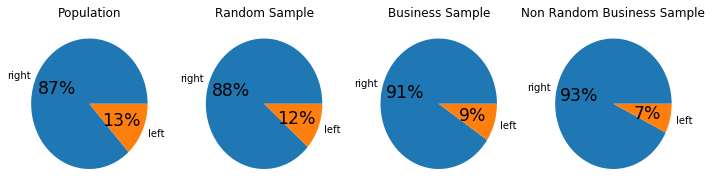

In [45]:
pop_labels = Population_Df.Handed.value_counts().index
pop_values = Population_Df.Handed.value_counts().values

smpl_labels = Random_Sample_Df.Handed.value_counts().index
smpl_values = Random_Sample_Df.Handed.value_counts().values

biz_labels = Business_Df.Handed.value_counts().index
biz_values = Business_Df.Handed.value_counts().values

nr_biz_labels = NonRandom_Business_Df.Handed.value_counts().index
nr_biz_values = NonRandom_Business_Df.Handed.value_counts().values

fig, axes = plt.subplots(1, 4)
fig.set_figwidth(12)
fig.set_figheight(3)

patches, texts, pop_autotexts = axes[0].pie(pop_values, labels=pop_labels, autopct='%.0f%%')
axes[0].set_title('Population')

patches, texts, smpl_autotexts  = axes[1].pie(smpl_values, labels=smpl_labels, autopct='%.0f%%')
axes[1].set_title('Random Sample')

patches, texts, biz_smpl_autotexts  = axes[2].pie(biz_values, labels=biz_labels, autopct='%.0f%%')
axes[2].set_title('Business Sample')

patches, texts, nr_biz_smpl_autotexts  = axes[3].pie(nr_biz_values, labels=nr_biz_labels, autopct='%.0f%%')
axes[3].set_title('Non Random Business Sample')

for t in pop_autotexts: t.set_size('xx-large')
for t in smpl_autotexts: t.set_size('xx-large')
for t in biz_smpl_autotexts: t.set_size('xx-large')
for t in nr_biz_smpl_autotexts: t.set_size('xx-large')

plt.show()

- We can see that distribution of `Handed` variable does not vary much (is within the 5% range from population), hence this sampling is good as far as `Handed` variable is concerned.
- Business sample seems to be within the range as well.
<table>
    <tr> 
        <th> Random Sample </th>
        <th> Business </th>
        <th> NR Business </th>
    </tr>
    <tr> 
        <td> OK </td>
        <td> OK </td>
        <td> <p style="color:red;"> NOT OK</p> </td>
    </tr>
</table>

## Comparing `Sex` variable

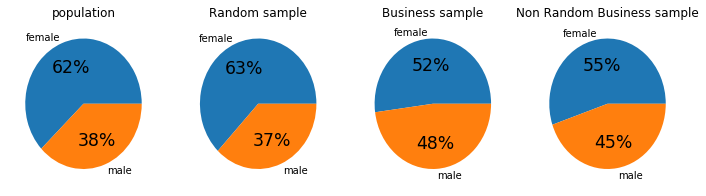

In [47]:
pop_labels = Population_Df.Sex.value_counts().index
pop_values = Population_Df.Sex.value_counts().values

smpl_labels = Random_Sample_Df.Sex.value_counts().index
smpl_values = Random_Sample_Df.Sex.value_counts().values

biz_labels = Business_Df.Sex.value_counts().index
biz_values = Business_Df.Sex.value_counts().values

nr_biz_labels = NonRandom_Business_Df.Sex.value_counts().index
nr_biz_values = NonRandom_Business_Df.Sex.value_counts().values

fig, axes = plt.subplots(1, 4)
fig.set_figwidth(12)
fig.set_figheight(3)

patches, texts, pop_autotexts = axes[0].pie(pop_values, labels=pop_labels, autopct='%.0f%%')
patches, texts, smpl_autotexts  = axes[1].pie(smpl_values, labels=smpl_labels, autopct='%.0f%%')
patches, texts, biz_autotexts  = axes[2].pie(biz_values, labels=biz_labels, autopct='%.0f%%')
patches, texts, nr_biz_autotexts  = axes[3].pie(nr_biz_values, labels=nr_biz_labels, autopct='%.0f%%')

axes[0].set_title('population')
axes[1].set_title('Random sample')
axes[2].set_title('Business sample')
axes[3].set_title('Non Random Business sample')

for t in pop_autotexts: t.set_size('xx-large')
for t in smpl_autotexts: t.set_size('xx-large')
for t in biz_autotexts: t.set_size('xx-large')
for t in nr_biz_autotexts: t.set_size('xx-large')

plt.show()

- We are good with `Sex` variable as well. Distribution seems to be fairly similar.
- Sample collected from business course, has biased toward male. Hence, it should not be considered as a good sample.

<table>
    <tr> 
        <th> Random Sample </th>
        <th> Business </th>
        <th> NR Business </th>
    </tr>
    <tr> 
        <td> OK </td>
        <td> <p style="color: red;">NOT OK </p></td>
        <td> <p style="color: red;">NOT OK </p></td>
    </tr>
</table>

## Comparing `Verbal` variable

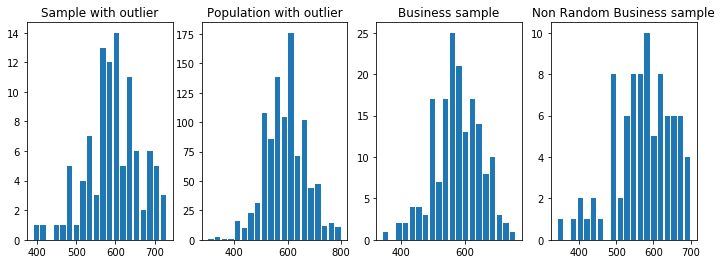

In [48]:
def change_verbal_to_arr(df):
    verbal = np.array(df[df['Verbal'] != '*']['Verbal'])
    return verbal.reshape(verbal.shape[0], 1)

def remove_verbal_outlier_if_any(verbal):
    verbal = verbal[verbal>400]
    verbal = verbal.reshape(verbal.shape[0], 1)
    return verbal;

smpl_verbal = change_verbal_to_arr(Random_Sample_Df)
pop_verbal = change_verbal_to_arr(Population_Df)
biz_verbal = change_verbal_to_arr(Business_Df)
nr_biz_verbal = change_verbal_to_arr(NonRandom_Business_Df)

num_of_bins = 20;

fig, axes = plt.subplots(1, 4)

fig.set_figwidth(12)
axes[0].hist(smpl_verbal, bins=num_of_bins, rwidth=0.8)
axes[0].set_title('Sample with outlier')

axes[1].hist(pop_verbal, bins=num_of_bins, rwidth=0.8)
axes[1].set_title('Population with outlier')

axes[2].hist(biz_verbal, bins=num_of_bins, rwidth=0.8)
axes[2].set_title('Business sample')

axes[3].hist(nr_biz_verbal, bins=num_of_bins, rwidth=0.8)
axes[3].set_title('Non Random Business sample')

plt.show()

 - This view suggests that both sample and population are normally distributed.
 - The way values are distributed does vary. Ex 
     - Population seems to have few potential outliers (<350). However, sample may or may not have those values. So we can do following exercise:
         - Remove the outlier and repaint the graph.
         - Compare the statistics which are not affected by outliers.

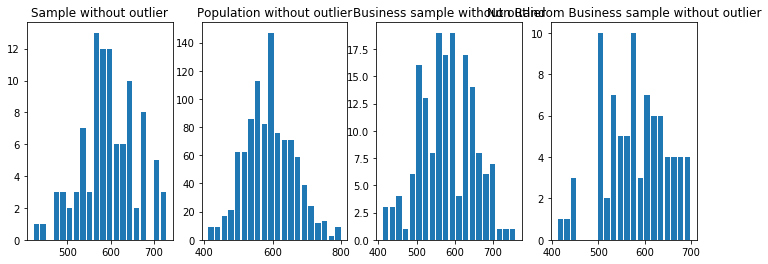

In [49]:
smpl_verbal = change_verbal_to_arr(Random_Sample_Df)
pop_verbal = change_verbal_to_arr(Population_Df)
biz_verbal = change_verbal_to_arr(Business_Df)
nr_biz_verbal = change_verbal_to_arr(NonRandom_Business_Df)

smpl_verbal = remove_verbal_outlier_if_any(smpl_verbal)
pop_verbal = remove_verbal_outlier_if_any(pop_verbal)
biz_verbal = remove_verbal_outlier_if_any(biz_verbal)
nr_biz_verbal = remove_verbal_outlier_if_any(nr_biz_verbal)
num_of_bins = 20;

fig, axes = plt.subplots(1, 4)

fig.set_figwidth(12)
axes[0].hist(smpl_verbal, bins=num_of_bins, rwidth=0.8)
axes[0].set_title('Sample without outlier')

axes[1].hist(pop_verbal, bins=num_of_bins, rwidth=0.8)
axes[1].set_title('Population without outlier')

axes[2].hist(biz_verbal, bins=num_of_bins, rwidth=0.8)
axes[2].set_title('Business sample without outlier')

axes[3].hist(nr_biz_verbal, bins=num_of_bins, rwidth=0.8)
axes[3].set_title('Non Random Business sample without outlier')

plt.show()

- Since distribution is `normal`, hence `mean` is appropiate measure of center.

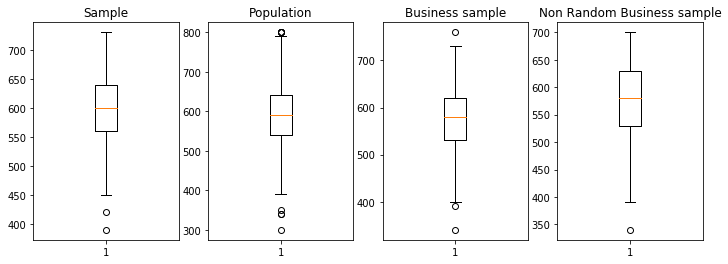

In [50]:
smpl_verbal = change_verbal_to_arr(Random_Sample_Df)
pop_verbal = change_verbal_to_arr(Population_Df)
biz_verbal = change_verbal_to_arr(Business_Df)
nr_biz_verbal = change_verbal_to_arr(NonRandom_Business_Df)

fig, axes = plt.subplots(1, 4)
fig.set_figwidth(12)

axes[0].boxplot(smpl_verbal)
axes[0].set_title('Sample')

axes[1].boxplot(pop_verbal)
axes[1].set_title('Population')

axes[2].boxplot(biz_verbal)
axes[2].set_title('Business sample')

axes[3].boxplot(nr_biz_verbal)
axes[3].set_title('Non Random Business sample')
plt.show()

- boxplot seems to be fairly similar, this suggest most of the data is situated in same region.
    -  `Q3-Q1` is almost identical.
    - span of tail and head are also quite similar, which suggest boundaries are at similar span.
- So, box plot suggest the distribution of data without taking outlier into account. In our case, sample seems to be good enough.
- Unanswered question
    - population has more outliers than sample, how do they affect the distribution overall.
    

In [51]:
smpl_verbal_stats = pd.Series(smpl_verbal.reshape(smpl_verbal.shape[0], ), dtype='float').describe()
pop_verbal_stats = pd.Series(pop_verbal.reshape(pop_verbal.shape[0], ), dtype='float').describe()
biz_verbal_stats = pd.Series(biz_verbal.reshape(biz_verbal.shape[0], ), dtype='float').describe()
nr_biz_verbal_stats = pd.Series(nr_biz_verbal.reshape(nr_biz_verbal.shape[0], ), dtype='float').describe()

pd.DataFrame({
    'sample_verbal': smpl_verbal_stats,
    'population_verbal': pop_verbal_stats,
    'biz_verbal': biz_verbal_stats,
    'nr_biz_verbal': nr_biz_verbal_stats
})

,sample_verbal,population_verbal,biz_verbal,nr_biz_verbal
count,101.000000,998.000000,171.000000,85.000000
mean,593.712871,588.780561,574.649123,572.882353
std,67.218500,76.081470,74.065907,76.704351
min,390.000000,300.000000,340.000000,340.000000
25%,560.000000,540.000000,530.000000,530.000000
50%,600.000000,590.000000,580.000000,580.000000
75%,640.000000,640.000000,620.000000,630.000000
max,730.000000,800.000000,760.000000,700.000000


- Since mean of the sample and population doesn't vary too much. So, it seems to be fair enough.
- For business sample as well, means seems to be fair enough. Although, it is not as good as random sample.

<table>
    <tr> 
        <th> Random Sample </th>
        <th> Business </th>
        <th> NR Business </th>
    </tr>
    <tr> 
        <td> OK </td>
        <td> OK </td>
        <td> OK </td>
    </tr>
</table>

## Comparing `Age` variable

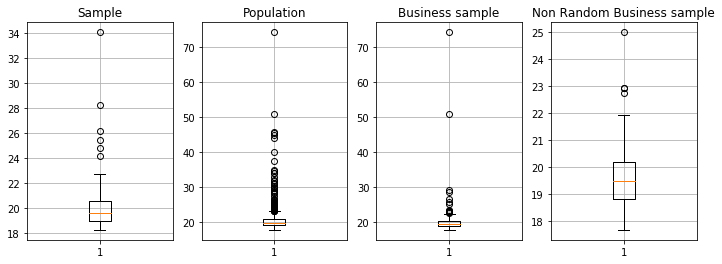

In [52]:
def remove_age_missing_val(df):
    return df[df['Age'] != '*']


smpl_age = remove_age_missing_val(Random_Sample_Df)['Age'].apply(lambda x: float(x))
pop_age = remove_age_missing_val(Population_Df)['Age'].apply(lambda x: float(x))
biz_age = remove_age_missing_val(Business_Df)['Age'].apply(lambda x: float(x))
nr_biz_age = remove_age_missing_val(NonRandom_Business_Df)['Age'].apply(lambda x: float(x))

fig, axes = plt.subplots(1, 4)
fig.set_figwidth(12)

axes[0].boxplot(smpl_age)
axes[0].set_title('Sample')
axes[0].grid()

axes[1].boxplot(pop_age)
axes[1].set_title('Population')
axes[1].grid()

axes[2].boxplot(biz_age)
axes[2].set_title('Business sample')
axes[2].grid()

axes[3].boxplot(nr_biz_age)
axes[3].set_title('Non Random Business sample')
axes[3].grid()

plt.show()

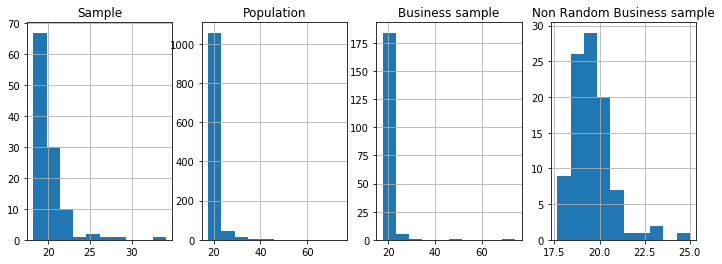

In [54]:

fig, axes = plt.subplots(1, 4)
fig.set_figwidth(12)

axes[0].hist(smpl_age)
axes[0].set_title('Sample')
axes[0].grid()

axes[1].hist(pop_age)
axes[1].set_title('Population')
axes[1].grid()

axes[2].hist(biz_age)
axes[2].set_title('Business sample')
axes[2].grid()

axes[3].hist(nr_biz_age)
axes[3].set_title('Non Random Business sample')
axes[3].grid()

plt.show()

In [55]:
pd.DataFrame(
    {
        'Population_Age': pop_age.describe(),
        'Sample_Age': smpl_age.describe(),
        'Business_Age': biz_age.describe(),
        'nr_Business_Age': nr_biz_age.describe()
    })

,Population_Age,Sample_Age,Business_Age,nr_Business_Age
count,1123.000000,113.000000,192.000000,96.000000
mean,20.374898,20.162655,20.306771,19.600937
std,3.188835,2.081398,4.785640,1.145336
min,17.670000,18.250000,17.670000,17.670000
25%,19.080000,19.000000,18.830000,18.810000
50%,19.670000,19.580000,19.500000,19.500000
75%,20.670000,20.580000,20.250000,20.170000
max,74.170000,34.080000,74.170000,25.000000


- Population seems to vary a lot, which increases the `std-dev` for population. Rest of the stats looks reasonable.
    - `std-dev` is high because distribution is skewed, and for skewed distribution `mean` is not appropriate measure of center. So, `median should be taken into account.`

<table>
    <tr> 
        <th> Random Sample </th>
        <th> Business </th>
        <th> NR Business </th>
    </tr>
    <tr> 
        <td> OK </td>
        <td> OK </td>
        <td> OK </td>
    </tr>
</table>

# Take-aways
 - If variable is categorical
     - Consider pie chart.
 - If variable is quantitative
     - Skewed
         - Consider median
     - Normal
         - Consider mean
     